# Урок 3. TensorFlow

## Домашнее задание

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас)

### Подключение библиотек

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Загрузка и подготовка данных

In [20]:
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

print('train_data.shape', train_data.shape)
print('test_data.shape ', test_data.shape)

train_data.shape (404, 13)
test_data.shape  (102, 13)


In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

train_df = pd.DataFrame(train_data, columns=column_names)
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [22]:
scaler = MinMaxScaler((-1, 1))
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

X_train

array([[-0.97243674, -1.        , -0.43695015, ...,  0.78723404,
         1.        , -0.06236203],
       [-0.99965269,  0.65      , -0.88489736, ..., -0.55319149,
         0.99233446, -0.92384106],
       [-0.89003245, -1.        ,  0.29325513, ...,  0.61702128,
         0.89217812, -0.91556291],
       ...,
       [-0.99936293, -0.3       , -0.58944282, ..., -0.08510638,
         0.82525594, -0.66335541],
       [-0.95182954, -1.        ,  0.40175953, ..., -0.55319149,
         0.31943114, -0.22406181],
       [-0.99981859,  0.2       , -0.81891496, ..., -0.36170213,
         0.898129  , -0.85375276]])

# Задание 1

### Модель 1.  
- Функция активации - relu  
- Количество слоев - 2
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - [20, 30, 40, 50]

Epoch 1/150
3/3 [==============================] - 1s 77ms/step - loss: 550.6357 - mse: 550.6357 - val_loss: 639.4810 - val_mse: 639.4810
Epoch 2/150
3/3 [==============================] - 0s 16ms/step - loss: 548.2335 - mse: 548.2335 - val_loss: 636.9742 - val_mse: 636.9742
Epoch 3/150
3/3 [==============================] - 0s 15ms/step - loss: 545.8975 - mse: 545.8975 - val_loss: 634.4995 - val_mse: 634.4995
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 543.5610 - mse: 543.5610 - val_loss: 632.0536 - val_mse: 632.0536
Epoch 5/150
3/3 [==============================] - 0s 16ms/step - loss: 541.2459 - mse: 541.2459 - val_loss: 629.6389 - val_mse: 629.6389
Epoch 6/150
3/3 [==============================] - 0s 15ms/step - loss: 538.9575 - mse: 538.9574 - val_loss: 627.2400 - val_mse: 627.2400
Epoch 7/150
3/3 [==============================] - 0s 15ms/step - loss: 536.7287 - mse: 536.7287 - val_loss: 624.8512 - val_mse: 624.8512
Epoch 8/150
3/3 [=================

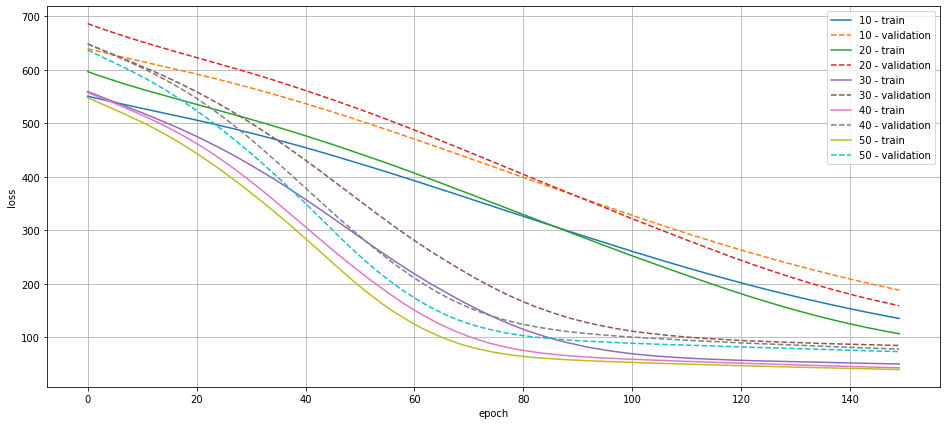

In [23]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

for neuron_num in [10, 20, 30, 40, 50]:
  
  # Build the model.
  model = Sequential([ Dense(neuron_num, 
                             activation='relu', 
                             input_shape=(13,)),
                       Dense(1, 
                             activation='linear')])

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model of {neuron_num} neurons'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{neuron_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{neuron_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [24]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
4,Model of 50 neurons,39.258190,72.750999
3,Model of 40 neurons,42.462315,77.438408
2,Model of 30 neurons,49.571491,84.218964
1,Model of 20 neurons,106.159828,158.611649
0,Model of 10 neurons,134.802795,187.839813


### Модель 2.  
- Функция активации - relu  
- Количество слоев - [2, 3, 5, 10]
- Оптимизацтор - Adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 73ms/step - loss: 557.9313 - mse: 557.9313 - val_loss: 645.0758 - val_mse: 645.0758
Epoch 2/150
3/3 [==============================] - 0s 16ms/step - loss: 552.9028 - mse: 552.9028 - val_loss: 639.8040 - val_mse: 639.8040
Epoch 3/150
3/3 [==============================] - 0s 15ms/step - loss: 547.9345 - mse: 547.9345 - val_loss: 634.5471 - val_mse: 634.5471
Epoch 4/150
3/3 [==============================] - 0s 15ms/step - loss: 542.9915 - mse: 542.9915 - val_loss: 629.3134 - val_mse: 629.3134
Epoch 5/150
3/3 [==============================] - 0s 17ms/step - loss: 538.0026 - mse: 538.0027 - val_loss: 624.1210 - val_mse: 624.1210
Epoch 6/150
3/3 [==============================] - 0s 20ms/step - loss: 533.1579 - mse: 533.1579 - val_loss: 618.9072 - val_mse: 618.9072
Epoch 7/150
3/3 [==============================] - 0s 16ms/step - loss: 528.1702 - mse: 528.1702 - val_loss: 613.6774 - val_mse: 613.6774
Epoch 8/150
3/3 [=================

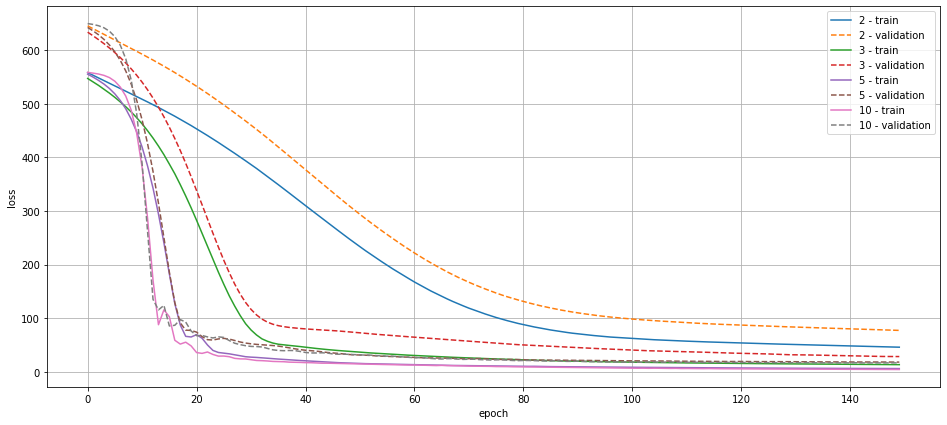

In [25]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40

for layers_num in [2, 3, 5, 10]:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer='adam',
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {layers_num} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{layers_num} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{layers_num} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
3,Model with 10 layers,4.250026,16.668781
2,Model with 5 layers,6.004341,18.068914
1,Model with 3 layers,13.302071,28.389235
0,Model with 2 layers,45.862408,77.185150


В данном случае наибольшее количество слоев показало наилучший результат.

### Модель 3.  
- Функция активации - relu  
- Количество слоев - 10
- Оптимизацтор - ['adam', 'sgd', 'rmsprop']
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 103ms/step - loss: 559.7894 - mse: 559.7894 - val_loss: 649.5072 - val_mse: 649.5072
Epoch 2/150
3/3 [==============================] - 0s 16ms/step - loss: 556.9445 - mse: 556.9445 - val_loss: 647.5901 - val_mse: 647.5901
Epoch 3/150
3/3 [==============================] - 0s 16ms/step - loss: 555.1958 - mse: 555.1958 - val_loss: 645.4867 - val_mse: 645.4867
Epoch 4/150
3/3 [==============================] - 0s 20ms/step - loss: 553.0292 - mse: 553.0292 - val_loss: 642.2163 - val_mse: 642.2163
Epoch 5/150
3/3 [==============================] - 0s 17ms/step - loss: 549.5306 - mse: 549.5307 - val_loss: 636.6601 - val_mse: 636.6601
Epoch 6/150
3/3 [==============================] - 0s 17ms/step - loss: 543.6130 - mse: 543.6130 - val_loss: 627.4947 - val_mse: 627.4947
Epoch 7/150
3/3 [==============================] - 0s 16ms/step - loss: 533.9438 - mse: 533.9438 - val_loss: 612.4777 - val_mse: 612.4777
Epoch 8/150
3/3 [================

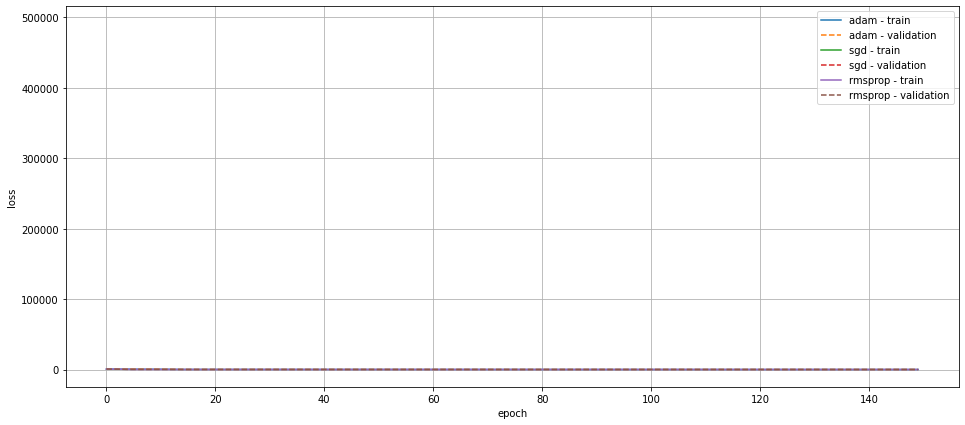

In [27]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10

optimizers = ['adam', 'sgd', 'rmsprop']

for opt in optimizers:

  layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation='relu'))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {opt} layers'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{opt} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{opt} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with adam layers,4.908568,16.034943
2,Model with rmsprop layers,13.086045,16.578276
1,Model with sgd layers,NaN,NaN


В начале обучения меньшую ошибку дает оптимайзер rmsprop, однако затем лучший результат показывает adam 

### Модель 4.  
- Функция активации - ['relu', 'tanh', 'linear', 'sigmoid']  
- Количество слоев - 10
- Оптимизацтор - adam
- Число нейронов в скрытом слое - 40

Epoch 1/150
3/3 [==============================] - 1s 107ms/step - loss: 558.9487 - mse: 558.9487 - val_loss: 649.0682 - val_mse: 649.0682
Epoch 2/150
3/3 [==============================] - 0s 19ms/step - loss: 556.5640 - mse: 556.5640 - val_loss: 646.9504 - val_mse: 646.9504
Epoch 3/150
3/3 [==============================] - 0s 16ms/step - loss: 554.3964 - mse: 554.3964 - val_loss: 643.8136 - val_mse: 643.8136
Epoch 4/150
3/3 [==============================] - 0s 16ms/step - loss: 551.0554 - mse: 551.0554 - val_loss: 638.6822 - val_mse: 638.6822
Epoch 5/150
3/3 [==============================] - 0s 18ms/step - loss: 545.4778 - mse: 545.4778 - val_loss: 629.9997 - val_mse: 629.9997
Epoch 6/150
3/3 [==============================] - 0s 17ms/step - loss: 536.0531 - mse: 536.0531 - val_loss: 615.2870 - val_mse: 615.2870
Epoch 7/150
3/3 [==============================] - 0s 18ms/step - loss: 520.2778 - mse: 520.2778 - val_loss: 590.3516 - val_mse: 590.3516
Epoch 8/150
3/3 [================

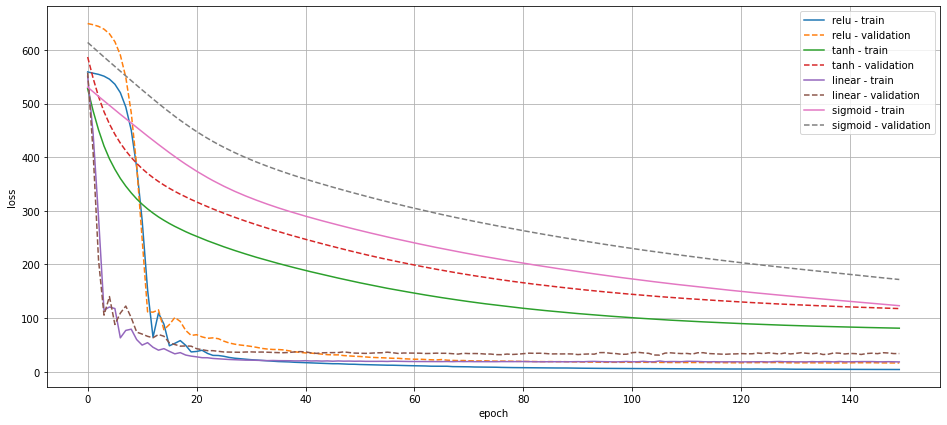

In [29]:
plt.figure(figsize=(16,7))

epochs = 150

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

activations = ['relu', 'tanh', 'linear', 'sigmoid']

for act in activations:

  layers_ = [Dense(neuron_num, activation=act, input_shape=(13,))]
  for l in range(layers_num-2):
    layers_.append(Dense(neuron_num, activation=act))
  layers_.append(Dense(1, activation='linear'))
  
  # Build the model.
  model = Sequential(layers_)

  # Compile the model.
  model.compile(
      optimizer=opt,
      loss='mse',
      metrics=['mse'],
  )

  # Train the model.
  history = model.fit(
      X_train,
      train_target,
      epochs=epochs,
      batch_size=120, 
      validation_split=0.3
  )

  # результаты
  model_name = f'Model with {act} activation'
  model_metric = history.history['mse'][epochs-1]
  model_val_metric = history.history['val_mse'][epochs-1]
  
  result.append([model_name, model_metric, model_val_metric])


  plt.plot(np.arange(epochs), history.history['loss'],    '-',  label = f'{act} - train')
  plt.plot(np.arange(epochs), history.history['val_loss'],'--', label = f'{act} - validation')
  
plt.legend()
plt.grid('On')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [30]:
result_table = pd.DataFrame(result, columns=['model_name', 'model_metric', 'model_val_metric']).sort_values('model_val_metric', ascending=True)
result_table.head(5)

,model_name,model_metric,model_val_metric
0,Model with relu activation,4.237277,16.440737
2,Model with linear activation,18.380413,33.942715
1,Model with tanh activation,81.253212,117.802231
3,Model with sigmoid activation,123.194344,172.035706


В данной задаче лучшие результаты показывают линейные модели

# Задание 2.

In [31]:
losses = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']
metrics = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error']

In [32]:
epochs = 200

result = []

neuron_num = 40
layers_num = 10
opt = 'adam'

In [33]:
layers_ = [Dense(neuron_num, activation='relu', input_shape=(13,))]
for l in range(layers_num-2):
  layers_.append(Dense(neuron_num, activation='relu'))
layers_.append(Dense(1, activation='linear'))
  
# Build the model.
model = Sequential(layers_)

In [34]:
for loss_ in losses:
    for metric_ in metrics:
    
        model.compile(optimizer=opt,
                      loss=loss_,
                      metrics=[metric_])
        
        model.fit(X_train, 
                  train_target,
                  epochs=epochs,
                  batch_size=120, 
                  validation_split=0.3)
        
        # Коэффициент детерминации на предсказании тестовой выборки
        y_test_pred = model.predict(X_test)
        
        [loss, metric] = model.evaluate(X_test, test_target, verbose=0)
               
        # накопление результатов
        result.append([loss_, loss, metric_, metric, r2_score(test_target, y_test_pred[:,0])])

Epoch 1/200
3/3 [==============================] - 1s 100ms/step - loss: 556.2117 - mean_squared_error: 556.2117 - val_loss: 642.3284 - val_mean_squared_error: 642.3284
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 549.1675 - mean_squared_error: 549.1675 - val_loss: 632.6920 - val_mean_squared_error: 632.6920
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 539.4177 - mean_squared_error: 539.4177 - val_loss: 617.5131 - val_mean_squared_error: 617.5131
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 523.9067 - mean_squared_error: 523.9067 - val_loss: 593.9758 - val_mean_squared_error: 593.9758
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 499.5637 - mean_squared_error: 499.5637 - val_loss: 557.5323 - val_mean_squared_error: 557.5323
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 462.6807 - mean_squared_error: 462.6807 - val_loss: 501.9996 - val_mean_squared_error: 

In [35]:
result_table = pd.DataFrame(result, columns=['loss name', 'loss value', 'metric name', 'metric value', 'r2 score']).sort_values('r2 score', ascending=False)
result_table.head(10)

,loss name,loss value,metric name,metric value,r2 score
0,mean_squared_error,21.911379,mean_squared_error,21.911379,0.736781
1,mean_squared_error,31.148199,mean_absolute_error,3.186300,0.625820
3,mean_absolute_error,3.451300,mean_squared_error,36.466911,0.561927
7,mean_absolute_percentage_error,19.602036,mean_absolute_error,3.473667,0.548640
2,mean_squared_error,37.642593,mean_absolute_percentage_error,19.209475,0.547803
8,mean_absolute_percentage_error,19.595348,mean_absolute_percentage_error,19.595348,0.547506
6,mean_absolute_percentage_error,19.568377,mean_squared_error,37.815529,0.545726
5,mean_absolute_error,3.480345,mean_absolute_percentage_error,19.745157,0.524290
4,mean_absolute_error,3.613951,mean_absolute_error,3.613951,0.522580


Точность сети помогли улучшить:

- выбор активатора,
- подбор количества эпох
- выбор количества слоев и количества нейроно в них



# Задание 3.

Полезные команды TensorFlow

 - *tf.feature_column* - различные обработки фичей, аналогия sklearn.preprocessing
 - *tf.metrics* - различные метрики